In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_g = pd.read_csv('tmdb_genres.csv')
df_g.columns=['genre_id','generes']
df_g.head()

,genre_id,generes
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [3]:
df_f = pd.read_csv('tmdb_movies.csv')
df_f.head(n=2)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0


1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [4]:
q3=df_f['vote_count'].quantile(.75)
top_ten = df_f[df_f['vote_count']>q3].sort_values('vote_average',ascending=False).head(10)
top_ten

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

In [5]:
import datetime 
df_f['release_date']=pd.to_datetime(df_f['release_date'])
df_f['year']=df_f['release_date'].dt.strftime('%Y').astype(float)

In [6]:
df=df_f[(df_f['year']<=2016)&(df_f['year']>=2010)]

In [7]:
df2=df.groupby(pd.Grouper(key='release_date',freq='Y')).mean()
df2

,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id,year
release_date,,,,,,,,,,
2010-12-31,2316.884444,3.449541e+07,42232.791111,21.340839,9.043811e+07,105.088889,5.968000,792.106667,658.888393,2010.0
2011-12-31,2333.426009,3.477232e+07,62532.973094,21.944447,9.200413e+07,103.744395,6.011211,783.991031,608.955157,2011.0
2012-12-31,2399.163462,3.492203e+07,91095.230769,25.527071,1.160659e+08,103.187500,5.909615,1105.668269,522.970874,2012.0
2013-12-31,2449.978355,3.552329e+07,144291.632035,28.135912,1.013485e+08,105.268398,6.089177,1135.939394,613.086957,2013.0
2014-12-31,2608.378151,3.095989e+07,223895.970588,37.480126,1.013466e+08,102.113445,5.578992,1046.163866,1243.267241,2014.0
2015-12-31,2584.037037,3.113216e+07,276972.175926,37.256857,1.054399e+08,103.144860,5.593981,973.972222,918.870813,2015.0
2016-12-31,2195.855769,4.570327e+07,299091.326923,37.128692,1.390496e+08,107.625000,5.833654,1146.384615,1145.807692,2016.0


In [8]:
def million(x, pos):
    return '{:2.1f}M'.format(x*1e-6)

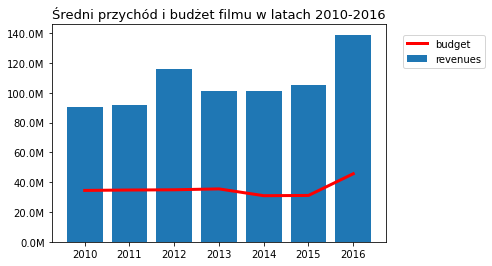

In [9]:
fig, ax = plt.subplots()

formatter = plt.FuncFormatter(million)

ax.yaxis.set_major_formatter(formatter)
ax.bar(df2['year'], df2['revenue'],label='revenues')
ax.plot(df2['year'],df2['budget'],'r',lw=3,label='budget')
ax.set_title('Średni przychód i budżet filmu w latach 2010-2016', 
             fontsize=13)
ax.legend(loc=(1.05,0.8))

3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [10]:
df_g.index=df_g['genre_id']
df_f_org = df_f
df_f=df_f.join(df_g, on='genre_id', lsuffix='_')
df_f

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id_,year,genre_id,generes
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009.0,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0,28.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,1992.0,28.0,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,2011.0,35.0,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,2013.0,35.0,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,2012.0,NaN,NaN


4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [11]:
df_f['generes'].value_counts().head(1)

Drama    1207
Name: generes, dtype: int64

5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?


In [12]:
df_f.groupby('generes').mean()['runtime'].sort_values(ascending=False).head(1)

generes
History    133.96
Name: runtime, dtype: float64

6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

In [13]:
df_long=df_f[df_f['generes']==df_f.groupby('generes').mean()['runtime'].idxmax()]

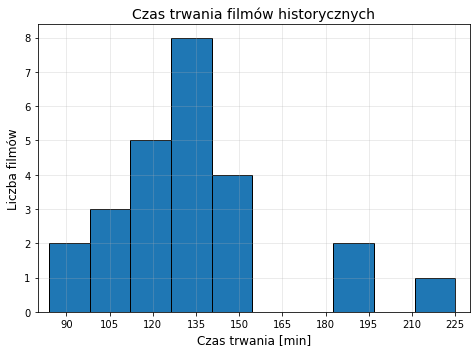

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.grid(alpha=0.3)
ax.set_xlim([80,230])
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.hist(df_long['runtime'],bins=10,edgecolor="k")
ax.set_xlabel('Czas trwania [min]', fontsize=12)
ax.set_ylabel('Liczba filmów', fontsize=12)
ax.set_title('Czas trwania filmów historycznych', fontsize=14)
plt.show()